In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from  sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv('C:/Users/tusha/Downloads/Glass Identification.csv')
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [3]:
df.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [4]:
x=['id number','RI','NA','Mg','Ai','Si','K','Ca','Ba','Fe','Type of glass']

In [5]:
df1=pd.read_csv('C:/Users/tusha/Downloads/Glass Identification.csv',names=x)

In [6]:
df1

,id number,RI,NA,Mg,Ai,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


here we have set the column names to our dataset now we can easily  understand and do  analysis also 

In [7]:
df1.head()

,id number,RI,NA,Mg,Ai,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [8]:
df1.tail()

,id number,RI,NA,Mg,Ai,Si,K,Ca,Ba,Fe,Type of glass
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [9]:
df1.sample()

,id number,RI,NA,Mg,Ai,Si,K,Ca,Ba,Fe,Type of glass
21,22,1.51966,14.77,3.75,0.29,72.02,0.03,9.0,0.0,0.0,1


In [10]:
df1.shape

(214, 11)

our dataset contains the 214 rows and 11 columns out of that 1 is our target variable('types of glass')

In [11]:
df1['id number'].nunique()

214

here we can see ('id number') is having 214 unique values it means for every record we have unique (id number) values
so we can make this feature as an index column

In [12]:
df1=df1.set_index('id number')
df1

,RI,NA,Mg,Ai,Si,K,Ca,Ba,Fe,Type of glass
id number,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


here we have set the (id number) feature as an index column


In [13]:
df1.columns.tolist()

['RI', 'NA', 'Mg', 'Ai', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1 to 214
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             214 non-null    float64
 1   NA             214 non-null    float64
 2   Mg             214 non-null    float64
 3   Ai             214 non-null    float64
 4   Si             214 non-null    float64
 5   K              214 non-null    float64
 6   Ca             214 non-null    float64
 7   Ba             214 non-null    float64
 8   Fe             214 non-null    float64
 9   Type of glass  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.4 KB


in this dataset we have 11 features out of that 9 are (float64) and rest of 2 are (int64)

In [15]:
df1.dtypes

RI               float64
NA               float64
Mg               float64
Ai               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of glass      int64
dtype: object

showing data types of each column 

In [16]:
df1.isnull().sum()

RI               0
NA               0
Mg               0
Ai               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

<Axes: ylabel='id number'>

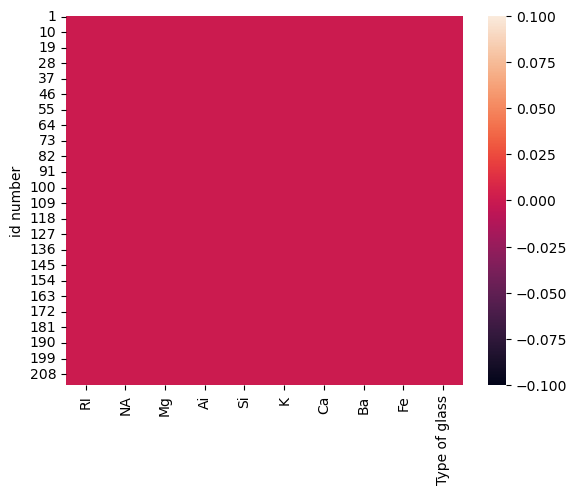

In [17]:
sns.heatmap(df1.isnull())

here we can see in this dataset  we don,t have the null values

In [18]:
df1.nunique().to_frame()

,0
RI,178
NA,142
Mg,94
Ai,118
Si,133
K,65
Ca,143
Ba,34
Fe,32
Type of glass,6


In [19]:
for i in df1.columns:
    print(df1[i].value_counts())
    print('\n')
    

1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 178, dtype: int64


13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: NA, Length: 142, dtype: int64


0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Mg, Length: 94, dtype: int64


1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Ai, Length: 118, dtype: int64


72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: Si, Length: 133, dtype: int64


0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
        ..
0.44     1
0.07     1
0.73     1
0.70     1
1.41     1
Name: K, Length: 65, dtype: int64


8.03    5
8.43    5
9.57    4
8.79    

this are the unique values present in to the features

In [20]:
df1.describe()

,RI,NA,Mg,Ai,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


by using describe method we can understand the percentile (min,25%,50%,75%,max)of the features and their mean value,standard deviation value,

in this dataset  there is not much difference between there mean value and 50% percentile 

in the Ca ('Calcium'), NA('sodium'('unit measurment:weight percent in corresponding Oxide,as are attributes 4-10')), K ('Potassium'),Ba('Barium'),Ai('Aluminium') we have bit difference between their 75% and the maximum values
so there might be outliers present in this features

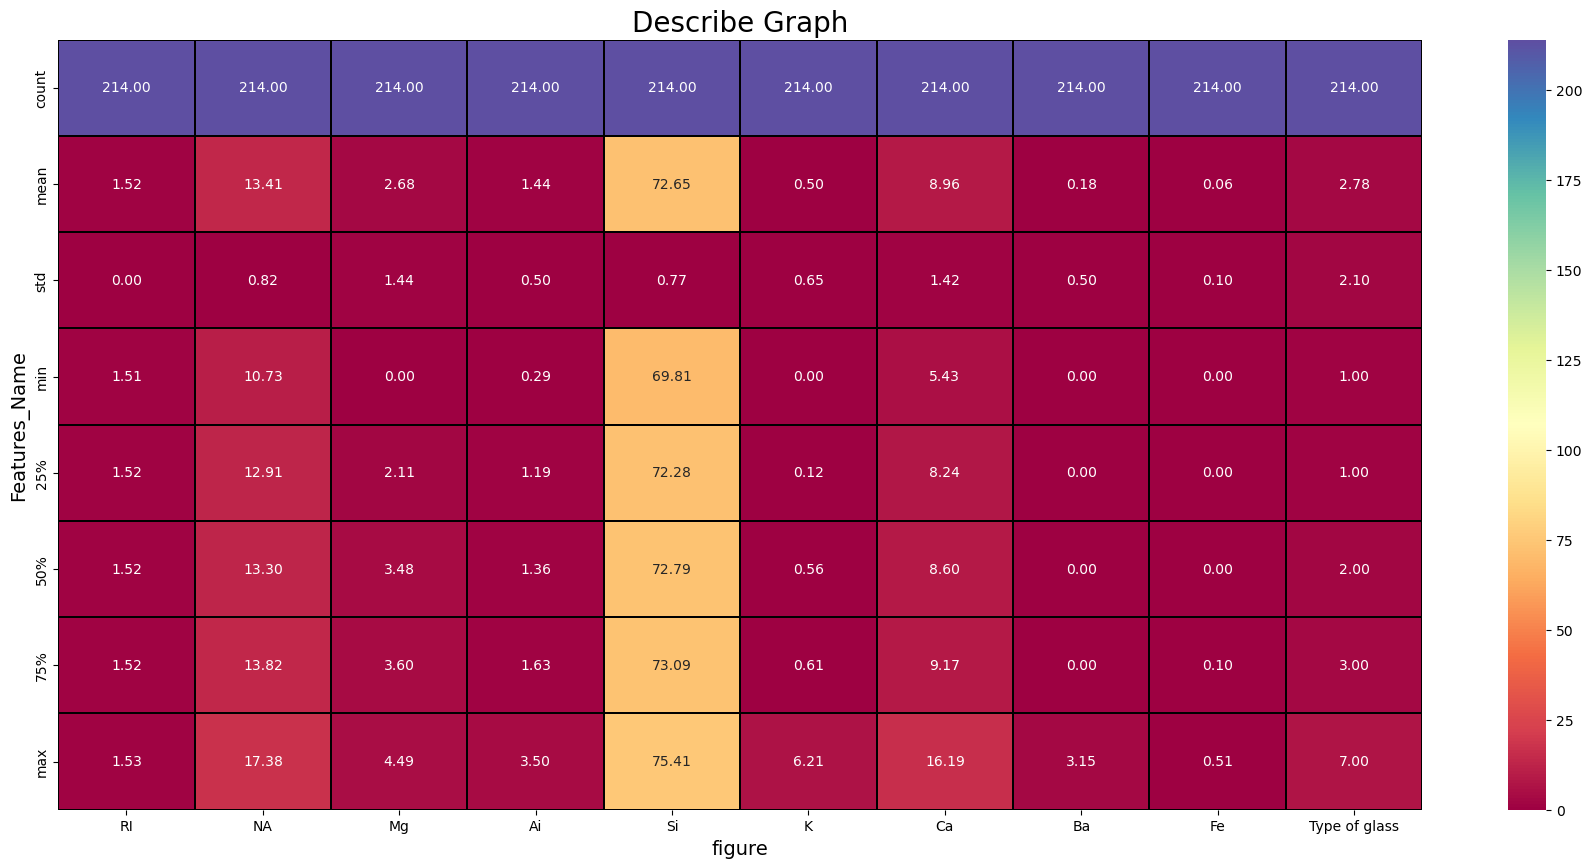

In [21]:
plt.figure(figsize=(22,10))
sns.heatmap(df1.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('figure',fontsize=14)
plt.ylabel('Features_Name',fontsize=14)
plt.title('Describe Graph',fontsize=20)
plt.show()

# Data Analysis

In [22]:
df1

,RI,NA,Mg,Ai,Si,K,Ca,Ba,Fe,Type of glass
id number,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


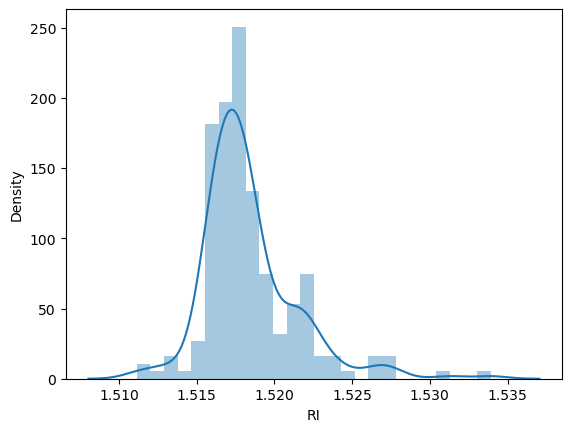

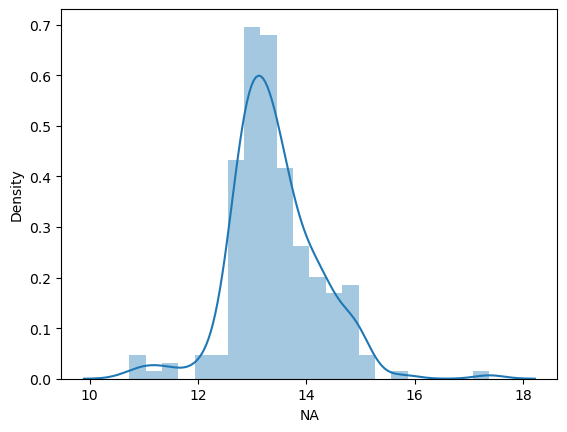

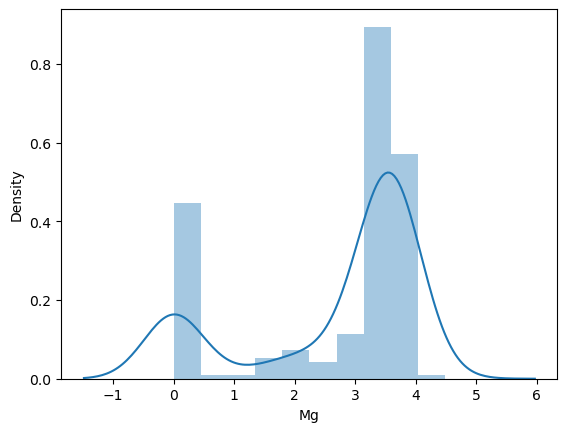

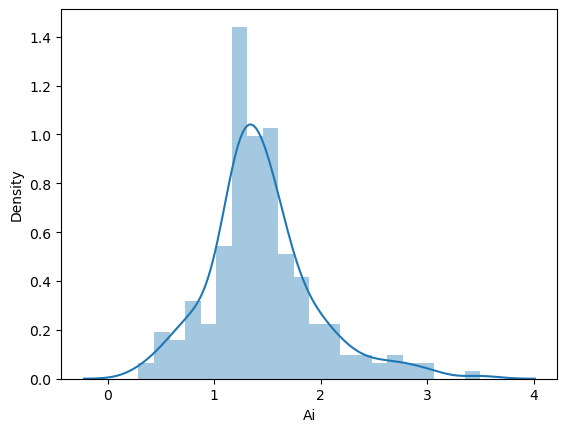

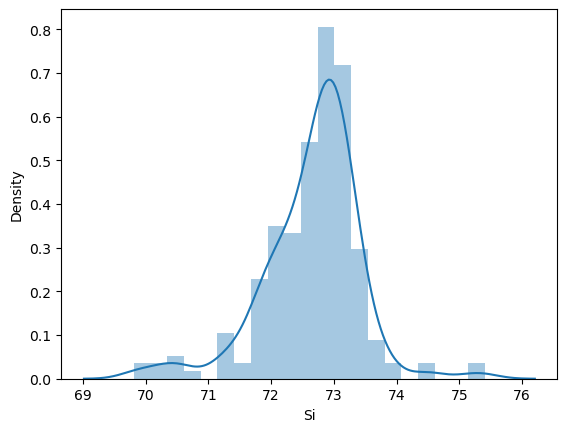

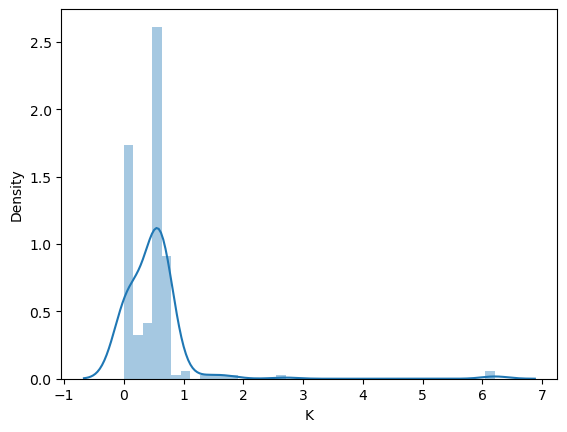

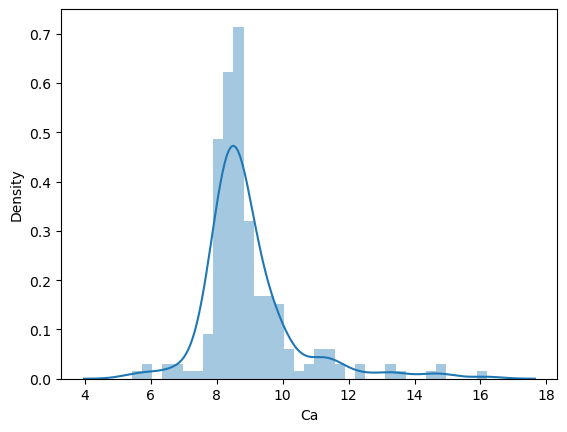

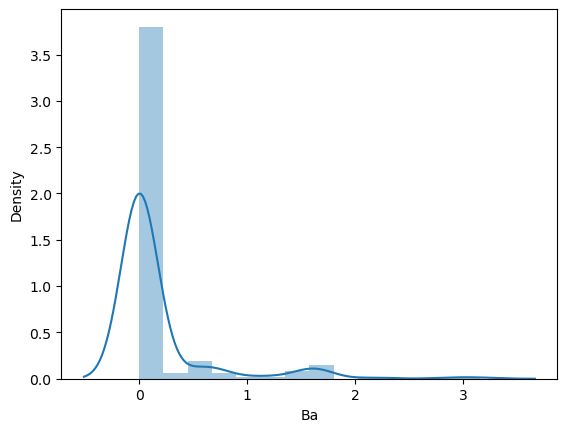

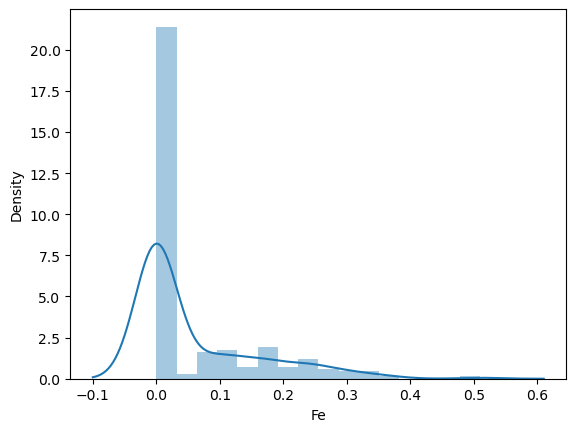

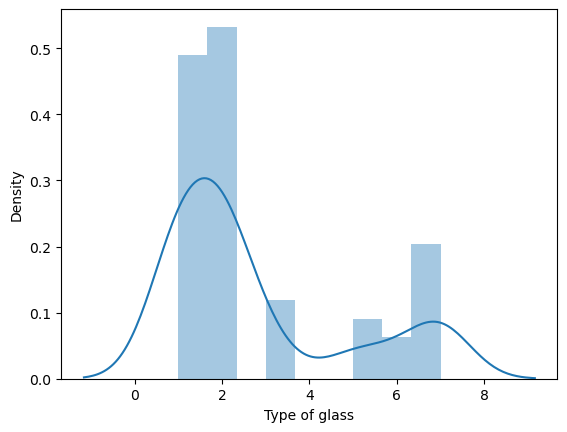

In [23]:
for i in df1.columns:
    sns.distplot(df1[i])
    plt.show()
    

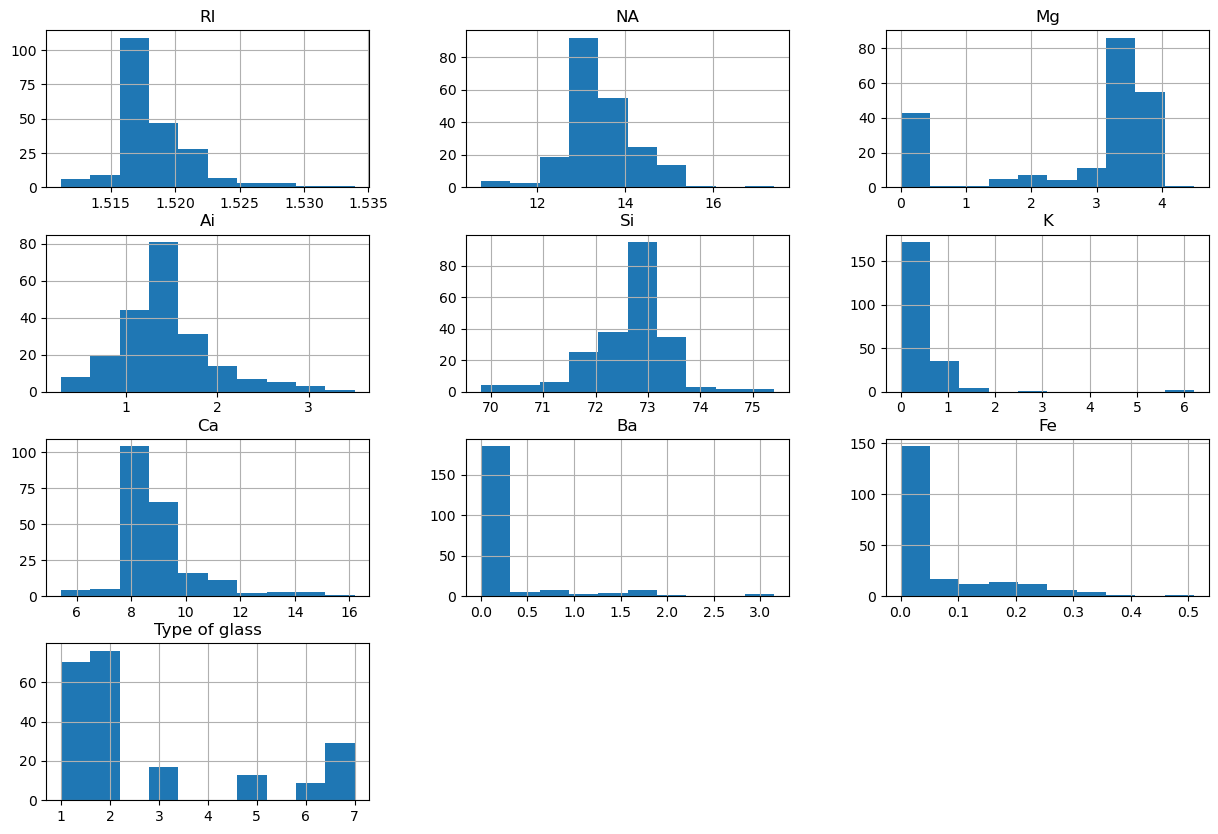

In [24]:
df1.hist(figsize=(15,10))
plt.show()

in the above hist plot we got 'RI'('refrective index'),'NA'('sodium'('unit measurment:weight percent in corresponding Oxide,as are attributes 4-10')),'AI'('Aluminium'),'si'('silicon'),'Ca'('Calcium') this are the features which are looking almost normally distributed

and in the other features we have skewed distribution 

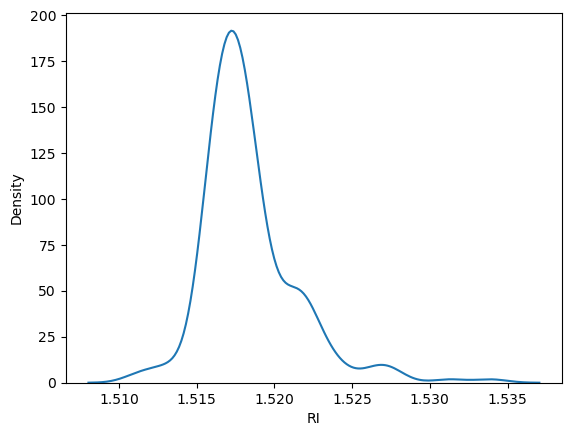

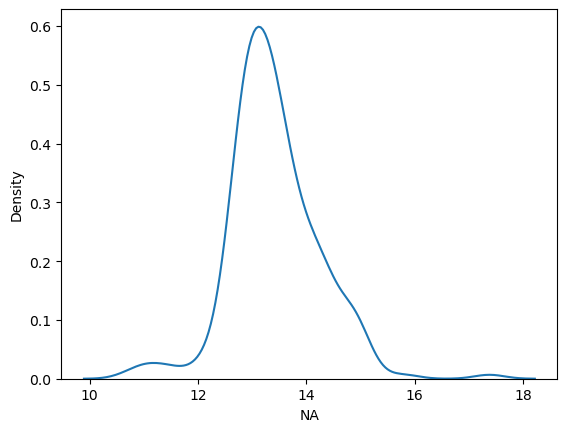

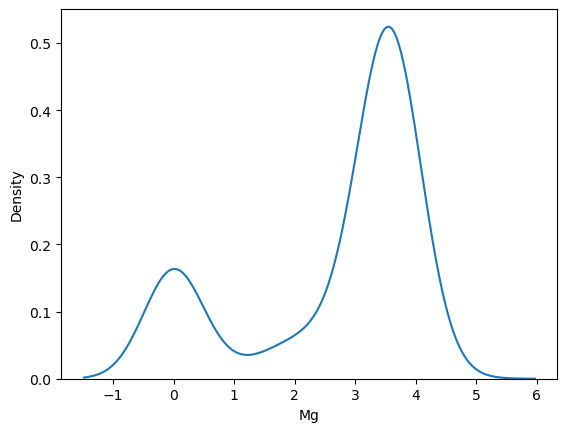

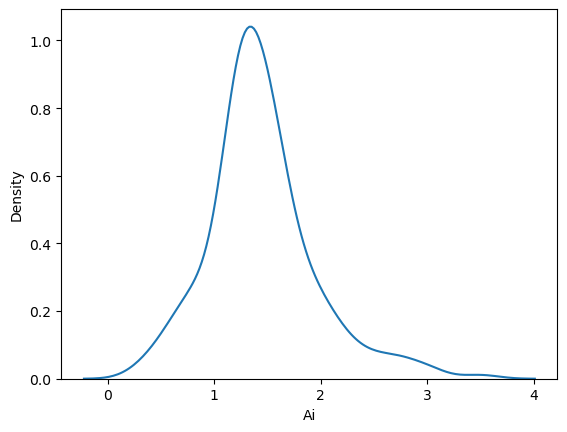

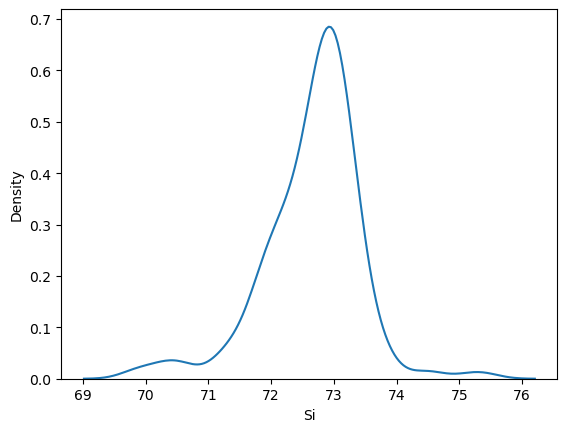

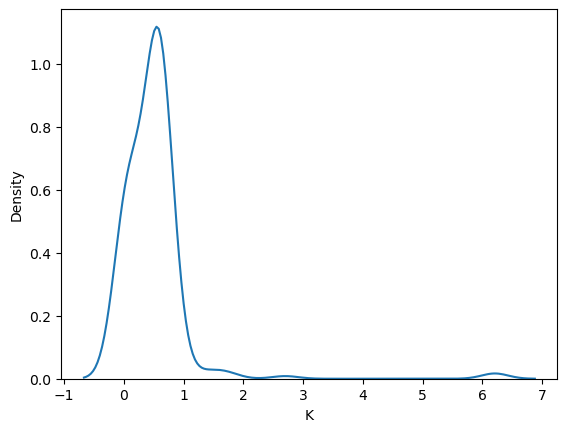

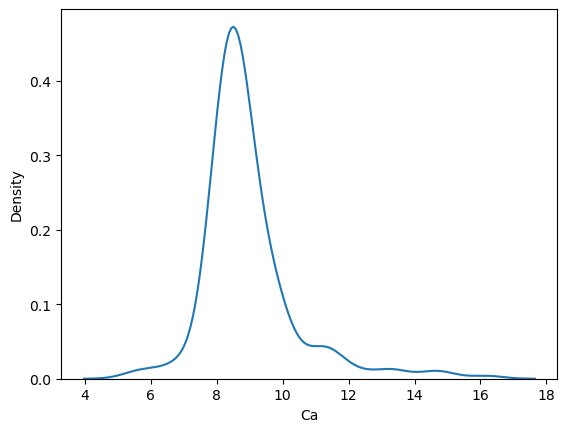

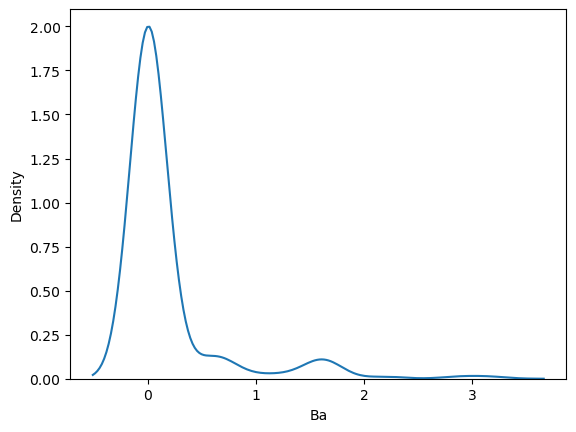

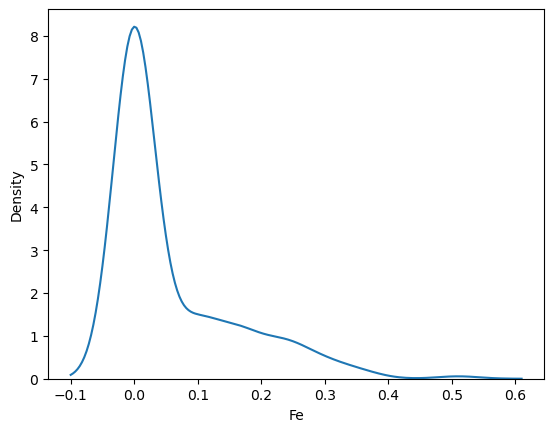

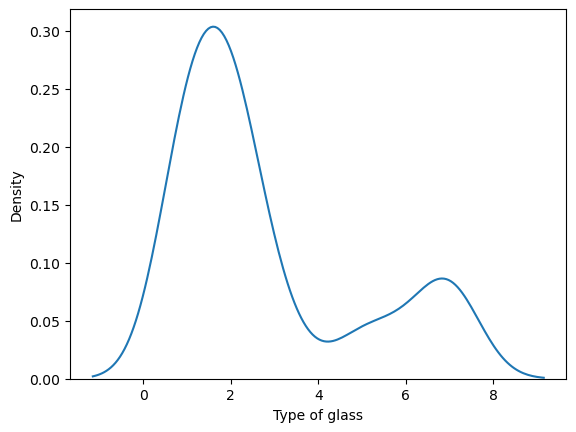

In [25]:
for i in df1.columns:
    sns.kdeplot(df1[i])
    plt.show()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64


<Axes: xlabel='Type of glass', ylabel='count'>

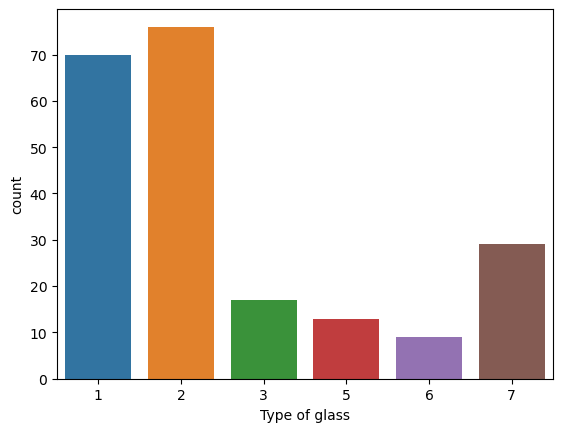

In [26]:
print(df1['Type of glass'].value_counts())
sns.countplot(x='Type of glass',data=df1)

in this countplot it is showing in the 1('building_windows_float_processed') and 2('building_windows_non_float_processed') (types of glass) range is very high it means in our dataset most of the glasses are 1('building_windows_float_processed') and 2('building_windows_non_float_processed') (types of glass) present

# Bivariate analysis

In [27]:
df1

,RI,NA,Mg,Ai,Si,K,Ca,Ba,Fe,Type of glass
id number,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


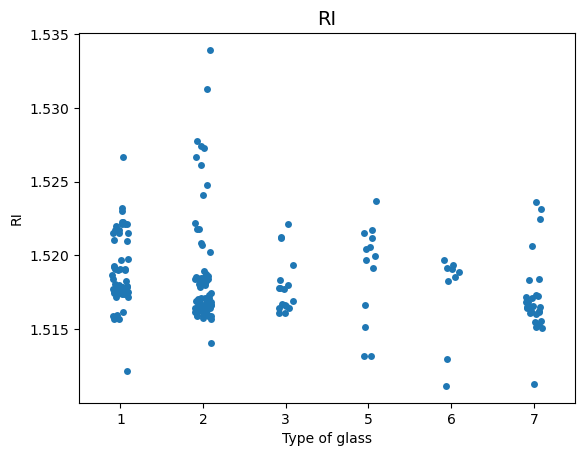

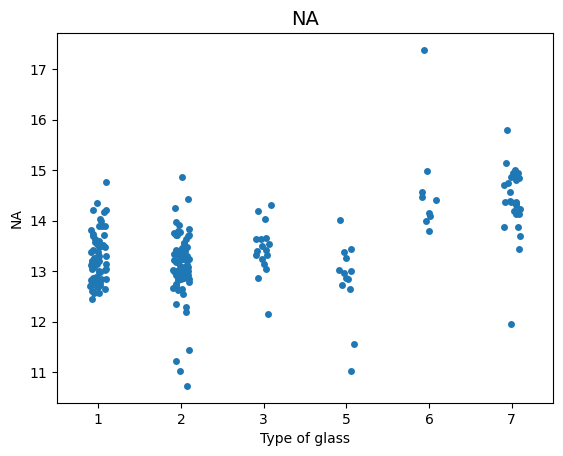

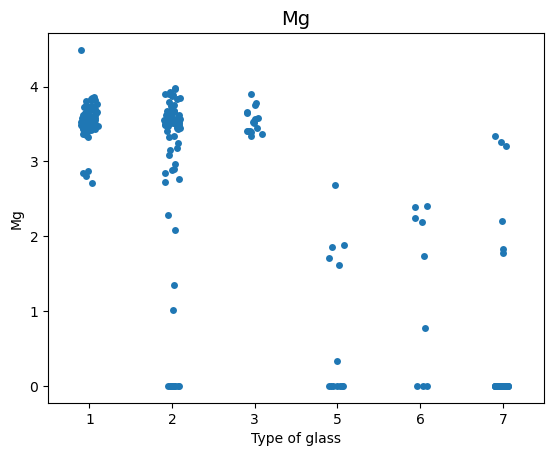

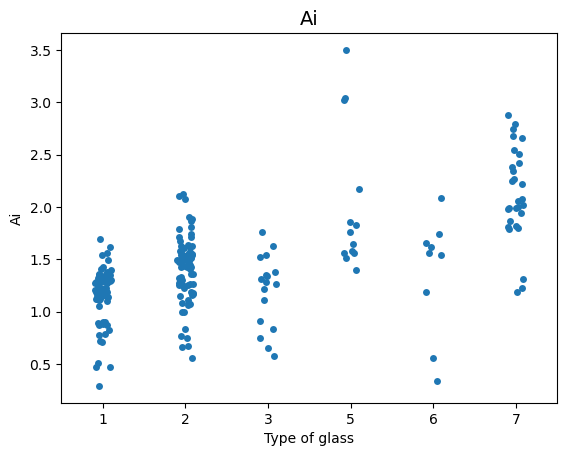

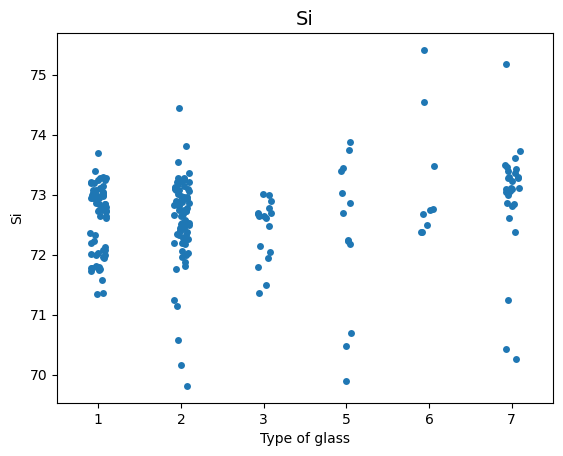

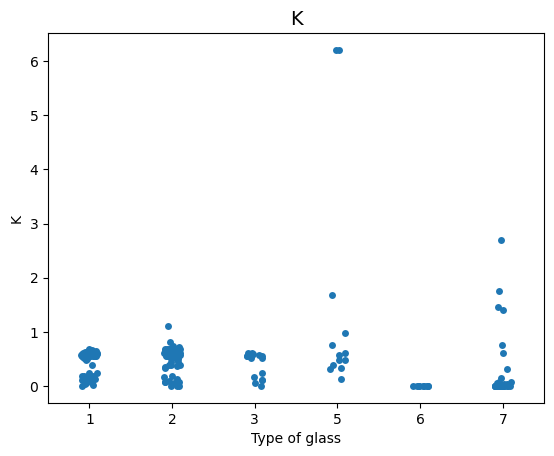

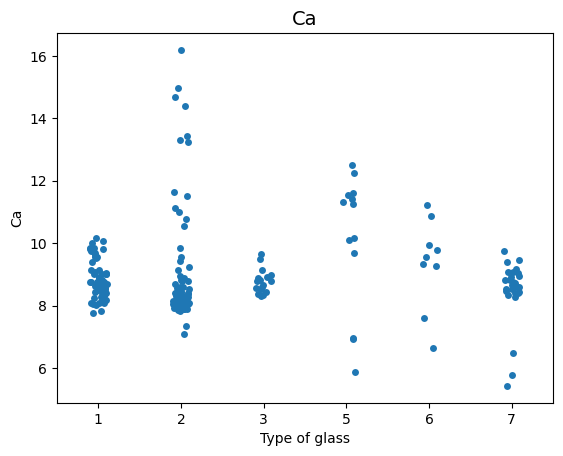

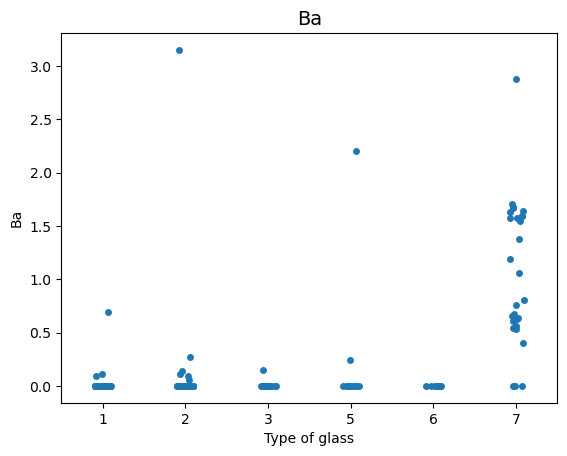

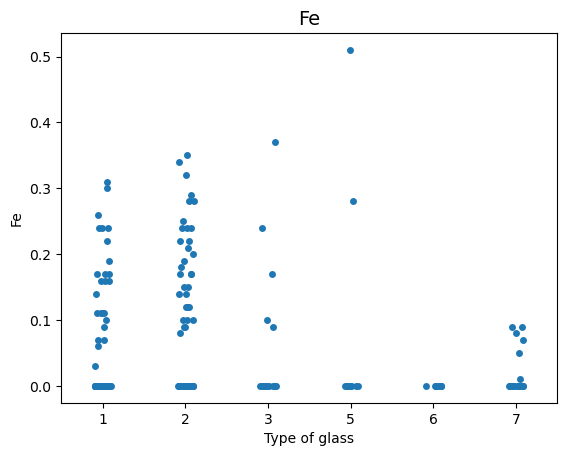

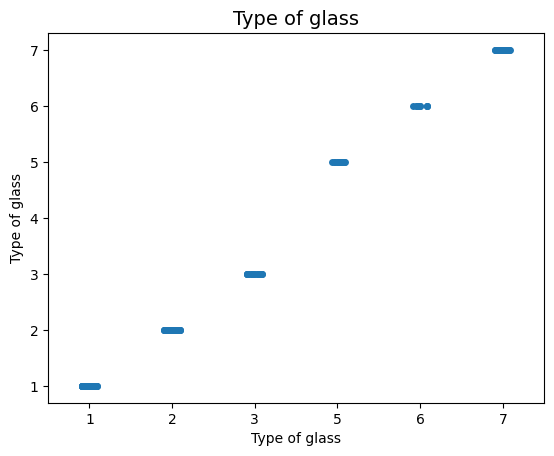

In [28]:
for i in df1.columns:
    sns.stripplot(x='Type of glass',y=i,data=df1)
    plt.title(i,fontsize=14)
    plt.show()

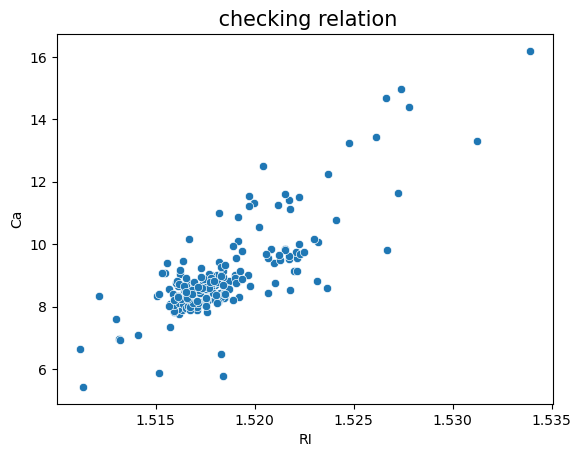

In [29]:
sns.scatterplot(x='RI',y='Ca',data=df1)
plt.title(' checking relation',fontsize=15)
plt.show()

in the scatter plot it is showing like Ca('calsium'),RI('refrective index')  both are positively correlated

# Multivariate Analysis

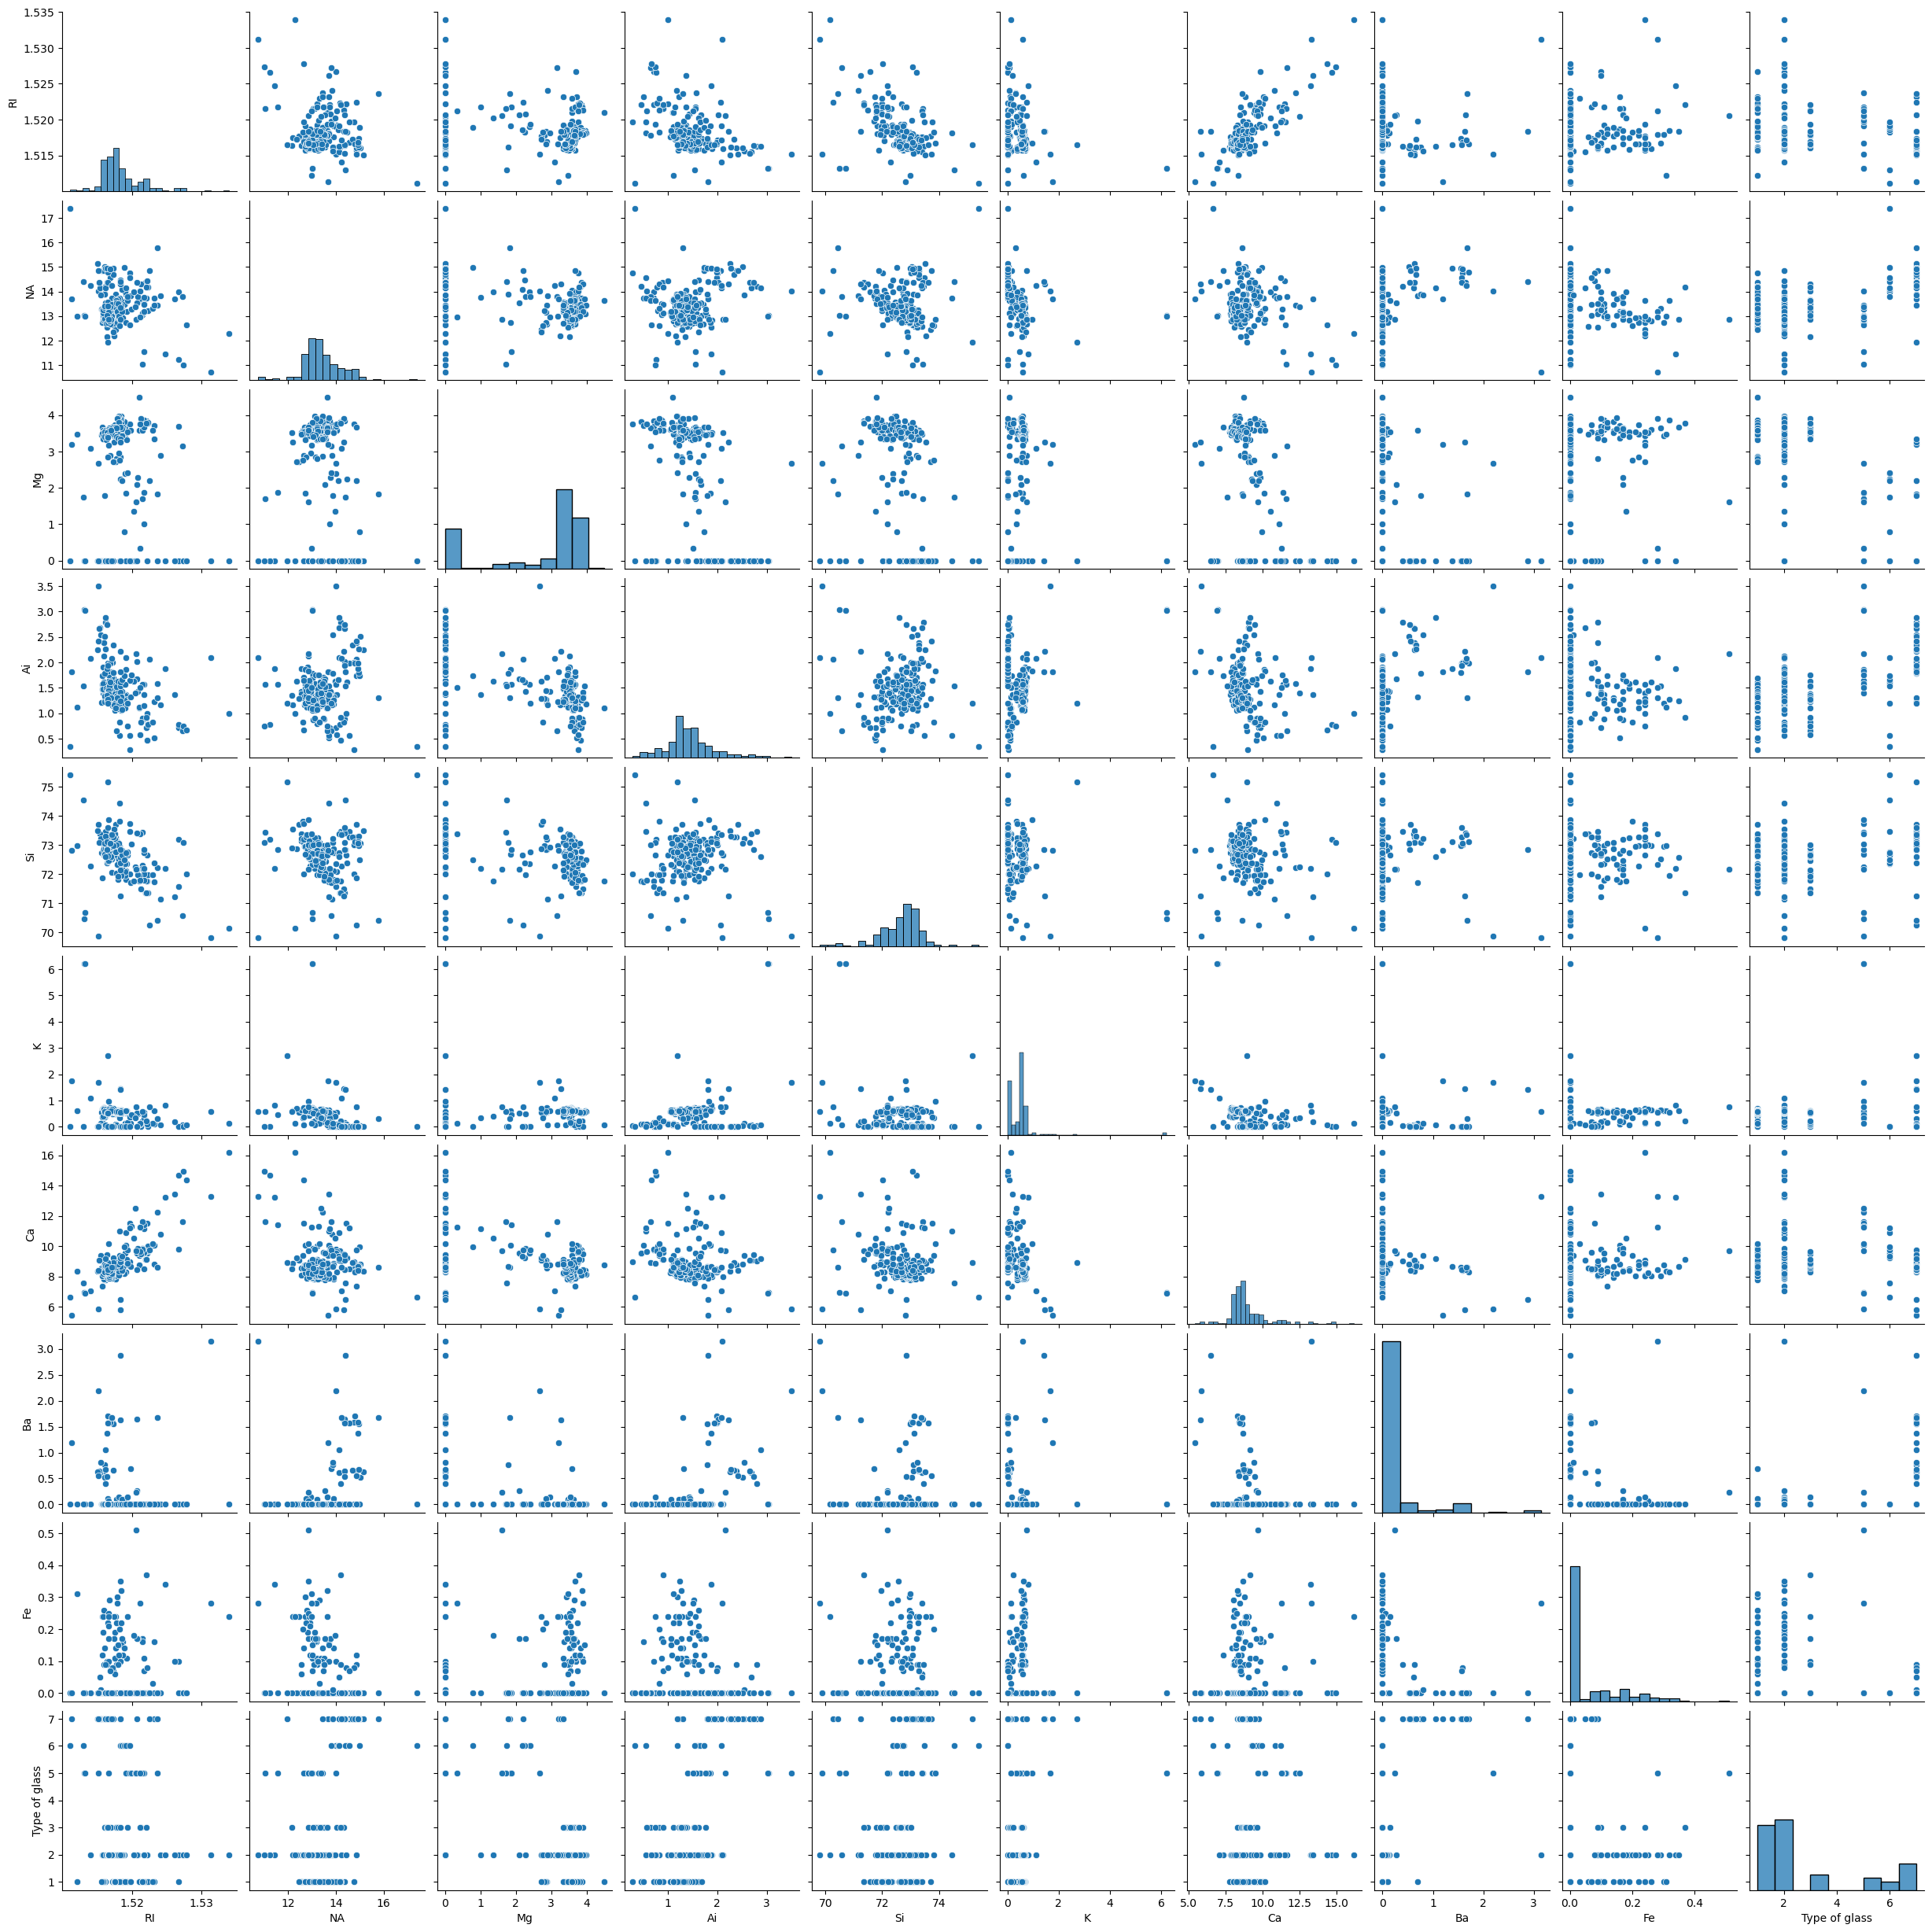

In [30]:
sns.pairplot(df1)
plt.show()

# make multiclass classification data to binary class classification data


In [31]:
df1['Type of glass'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [32]:
df1['Type of glass']=[1 if x<=4 else 0 for x in df1['Type of glass'] ]

In [33]:
df1['Type of glass'].unique()

array([1, 0], dtype=int64)

In [34]:
df1['Type of glass'].value_counts()

1    163
0     51
Name: Type of glass, dtype: int64

here we made the multiclassification data into binary class classification data after inserting the values within 0 and 1 so in this dataset 1 is representing the ('window glass') and 0 is representing the ('non window glass')

# Checking the outliers

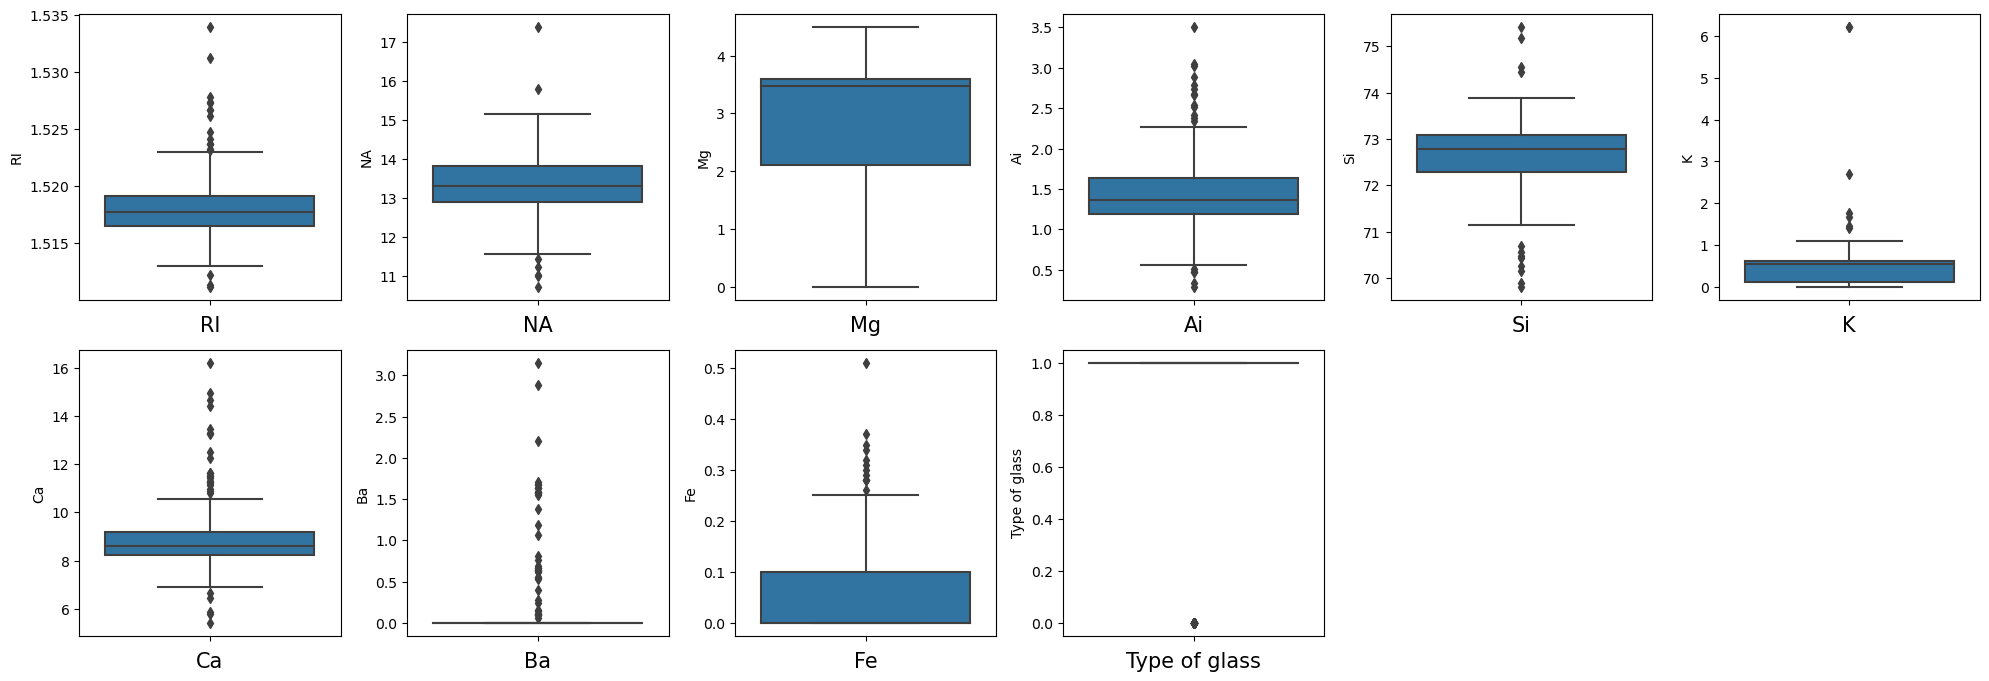

In [35]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in df1.columns:
    if plotnumber <=15:
        ax=plt.subplot(6,6,plotnumber)
        sns.boxplot(y=i,data=df1)
        plt.xlabel(i,fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
        
    plotnumber+=1
plt.tight_layout()
        

as we can see in the above boxplot most of the features  are having the outliers in our dataset because we are having  all the numeric values so we can use the zscore method for removing the outliers from the dataset 

# removing the outliers by using(zscore)

In [36]:
z=np.abs(zscore(df1))
z

,RI,NA,Mg,Ai,Si,K,Ca,Ba,Fe,Type of glass
id number,,,,,,,,,,
1,0.872868,0.284953,1.254639,0.692442,1.127082,0.671705,0.145766,0.352877,0.586451,0.559360
2,0.249333,0.591817,0.636168,0.170460,0.102319,0.026213,0.793734,0.352877,0.586451,0.559360
3,0.721318,0.149933,0.601422,0.190912,0.438787,0.164533,0.828949,0.352877,0.586451,0.559360
4,0.232831,0.242853,0.698710,0.310994,0.052974,0.112107,0.519052,0.352877,0.586451,0.559360
5,0.312045,0.169205,0.650066,0.411375,0.555256,0.081369,0.624699,0.352877,0.586451,0.559360
...,...,...,...,...,...,...,...,...,...,...
210,0.704815,0.898681,1.865511,2.881125,0.052974,0.640968,0.157088,1.783978,0.586451,1.787758
211,0.500178,1.856097,1.865511,1.094342,0.529374,0.763919,0.392276,2.852405,0.586451,1.787758
212,0.754046,1.168721,1.865511,1.154570,0.995252,0.763919,0.364103,2.953200,0.586451,1.787758


In [37]:
np.where(z>3)

(array([105, 106, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112,
        131, 145, 162, 163, 163, 163, 171, 171, 172, 172, 174, 184, 184,
        188, 189, 201, 201, 203, 207, 213], dtype=int64),
 array([6, 0, 1, 4, 6, 7, 0, 4, 6, 6, 6, 0, 6, 6, 8, 8, 3, 4, 7, 3, 5, 3,
        5, 8, 1, 4, 4, 7, 4, 5, 7, 7, 7], dtype=int64))

In [38]:
df_new=df1[(z<3).all(axis=1)]


In [39]:
df_new

,RI,NA,Mg,Ai,Si,K,Ca,Ba,Fe,Type of glass
id number,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,0
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,0
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,0


In [40]:
# shape of old and new dataframe
print('Old Data Frame-',df1.shape[0])
print('Old Data Frame',df_new.shape[0])

Old Data Frame- 214
Old Data Frame 194


In [41]:
print('Data Loss percentage-',((df1.shape[0]-df_new.shape[0])/df1.shape[0])*100)

Data Loss percentage- 9.345794392523365


here we have removed the outliers from our dataset

# Checking the skeweness

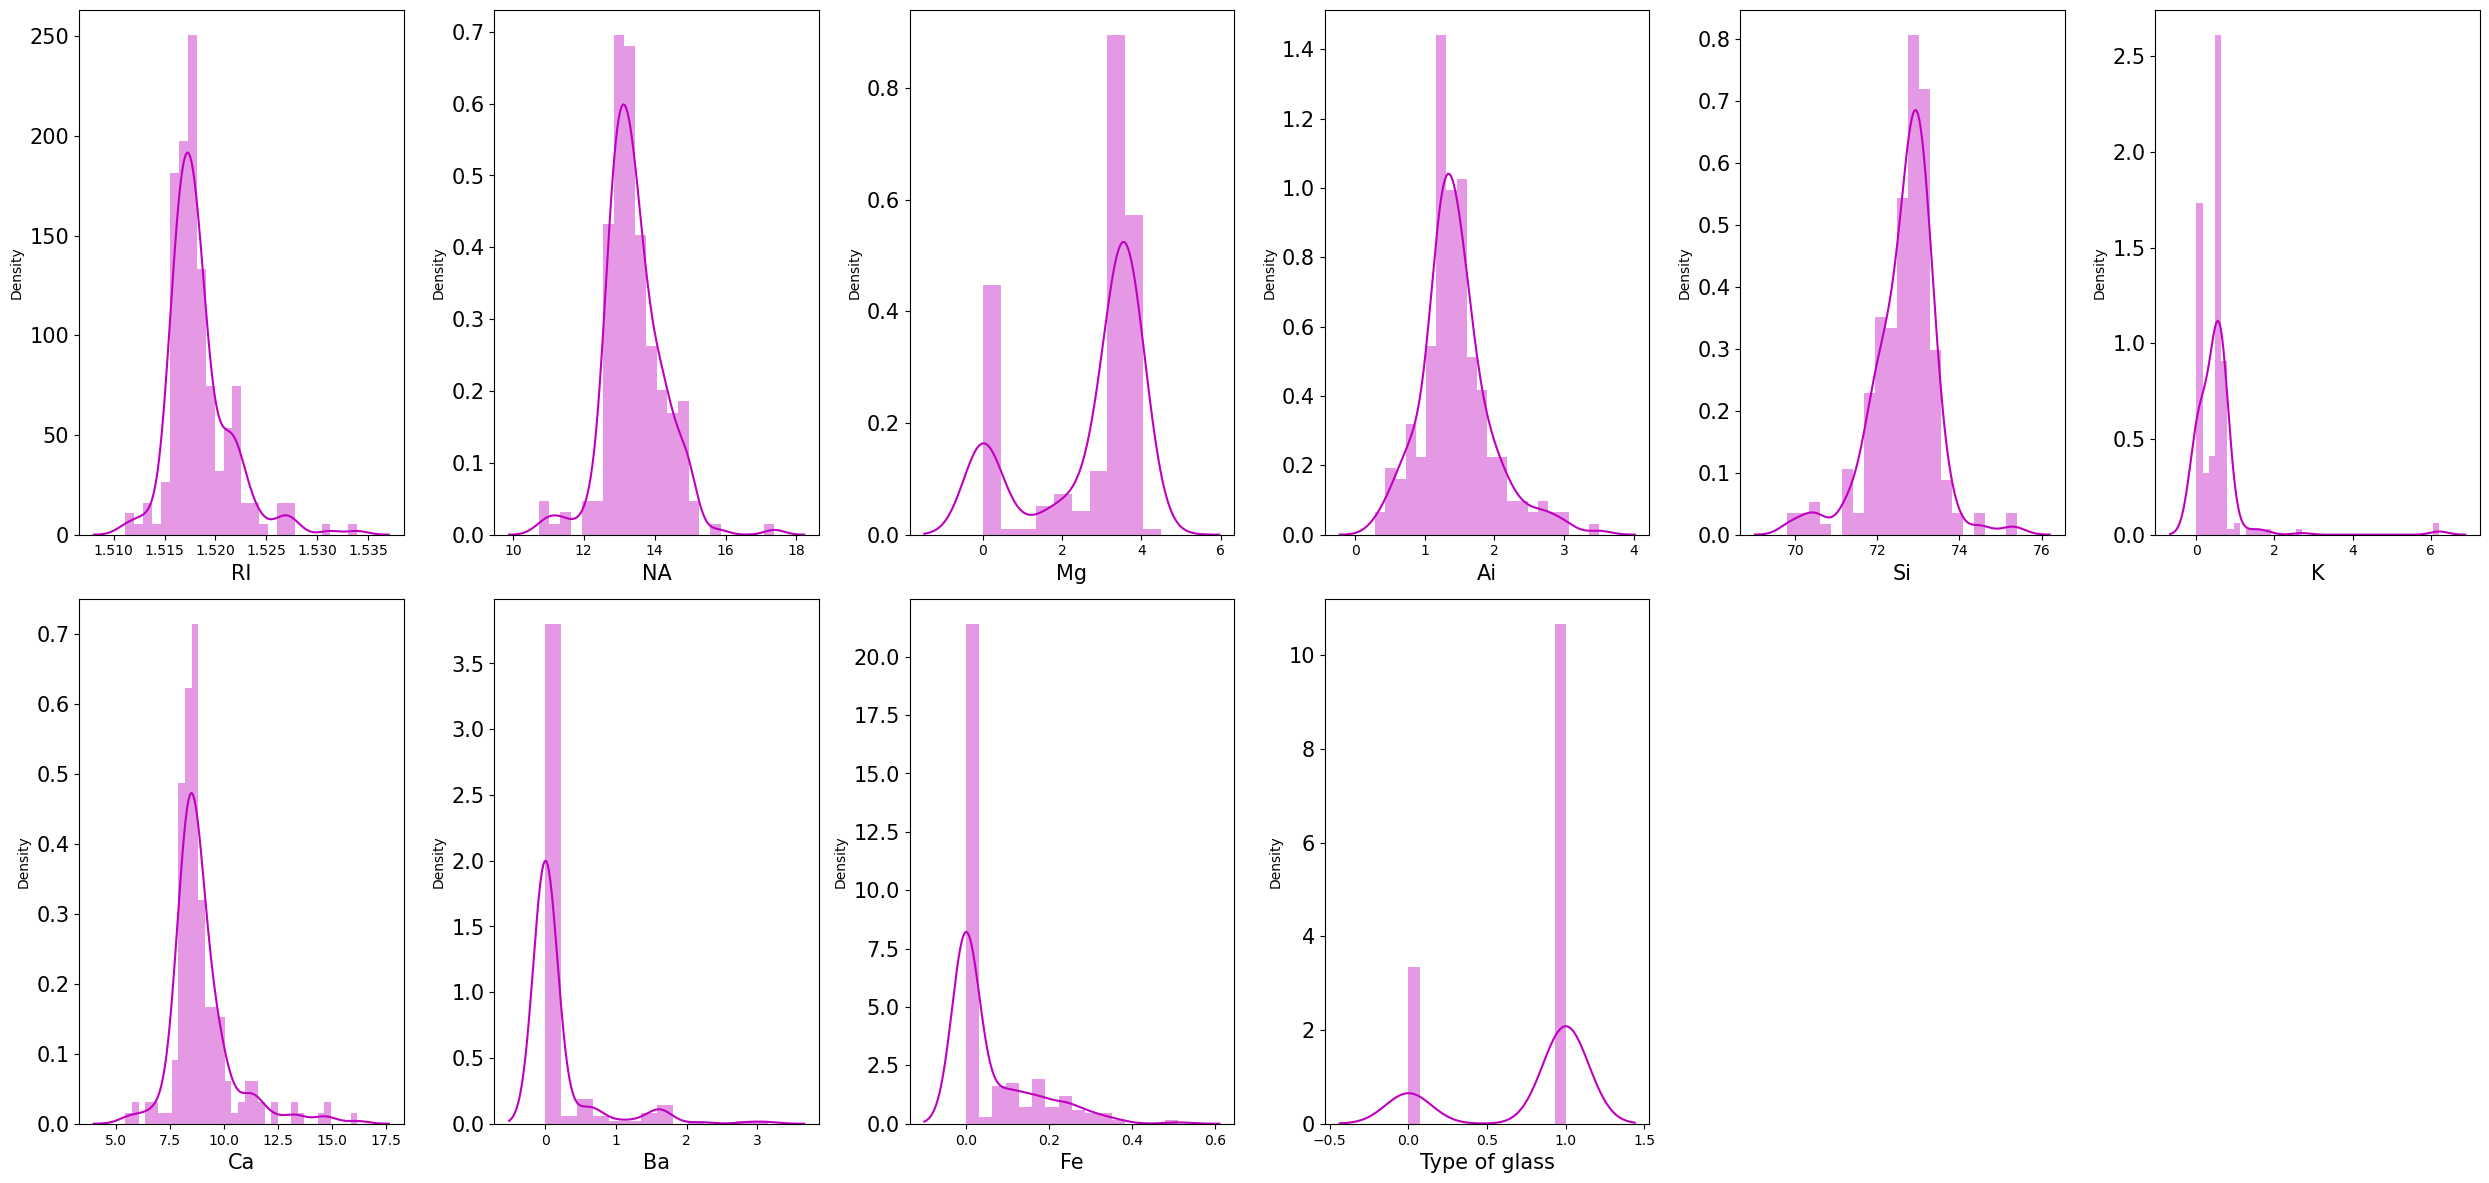

In [42]:
plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1
for i in df1:
    if plotnumber<=15:
        ax=plt.subplot(6,6,plotnumber)
        sns.distplot(df1[i],color='m')
        plt.xlabel(i,fontsize=15)
        plt.yticks(rotation=0,fontsize=15)
        
    plotnumber+=1
plt.tight_layout()

In [43]:
df1.skew()

RI               1.625431
NA               0.454181
Mg              -1.152559
Ai               0.907290
Si              -0.730447
K                6.551648
Ca               2.047054
Ba               3.416425
Fe               1.754327
Type of glass   -1.237086
dtype: float64

In [44]:
for i in df1.columns:
    if i!='Type of glass':
        df1[i]=np.sqrt(df1[i])

In [45]:
df1.skew()

RI               1.619143
NA               0.242897
Mg              -1.365097
Ai               0.092350
Si              -0.765323
K                0.871221
Ca               1.572031
Ba               2.377201
Fe               1.053218
Type of glass   -1.237086
dtype: float64

In [46]:
for i in df1.columns:
    if i!='Type of glass':
        df1[i]=np.cbrt(df1[i])

In [47]:
df1.skew()

RI               1.614957
NA               0.103668
Mg              -1.506926
Ai              -0.516324
Si              -0.788472
K               -1.609127
Ca               1.238920
Ba               1.817761
Fe               0.785595
Type of glass   -1.237086
dtype: float64

here we have descreased the skeweness using 'np.sqrt' method and the 'np.cbrt' method

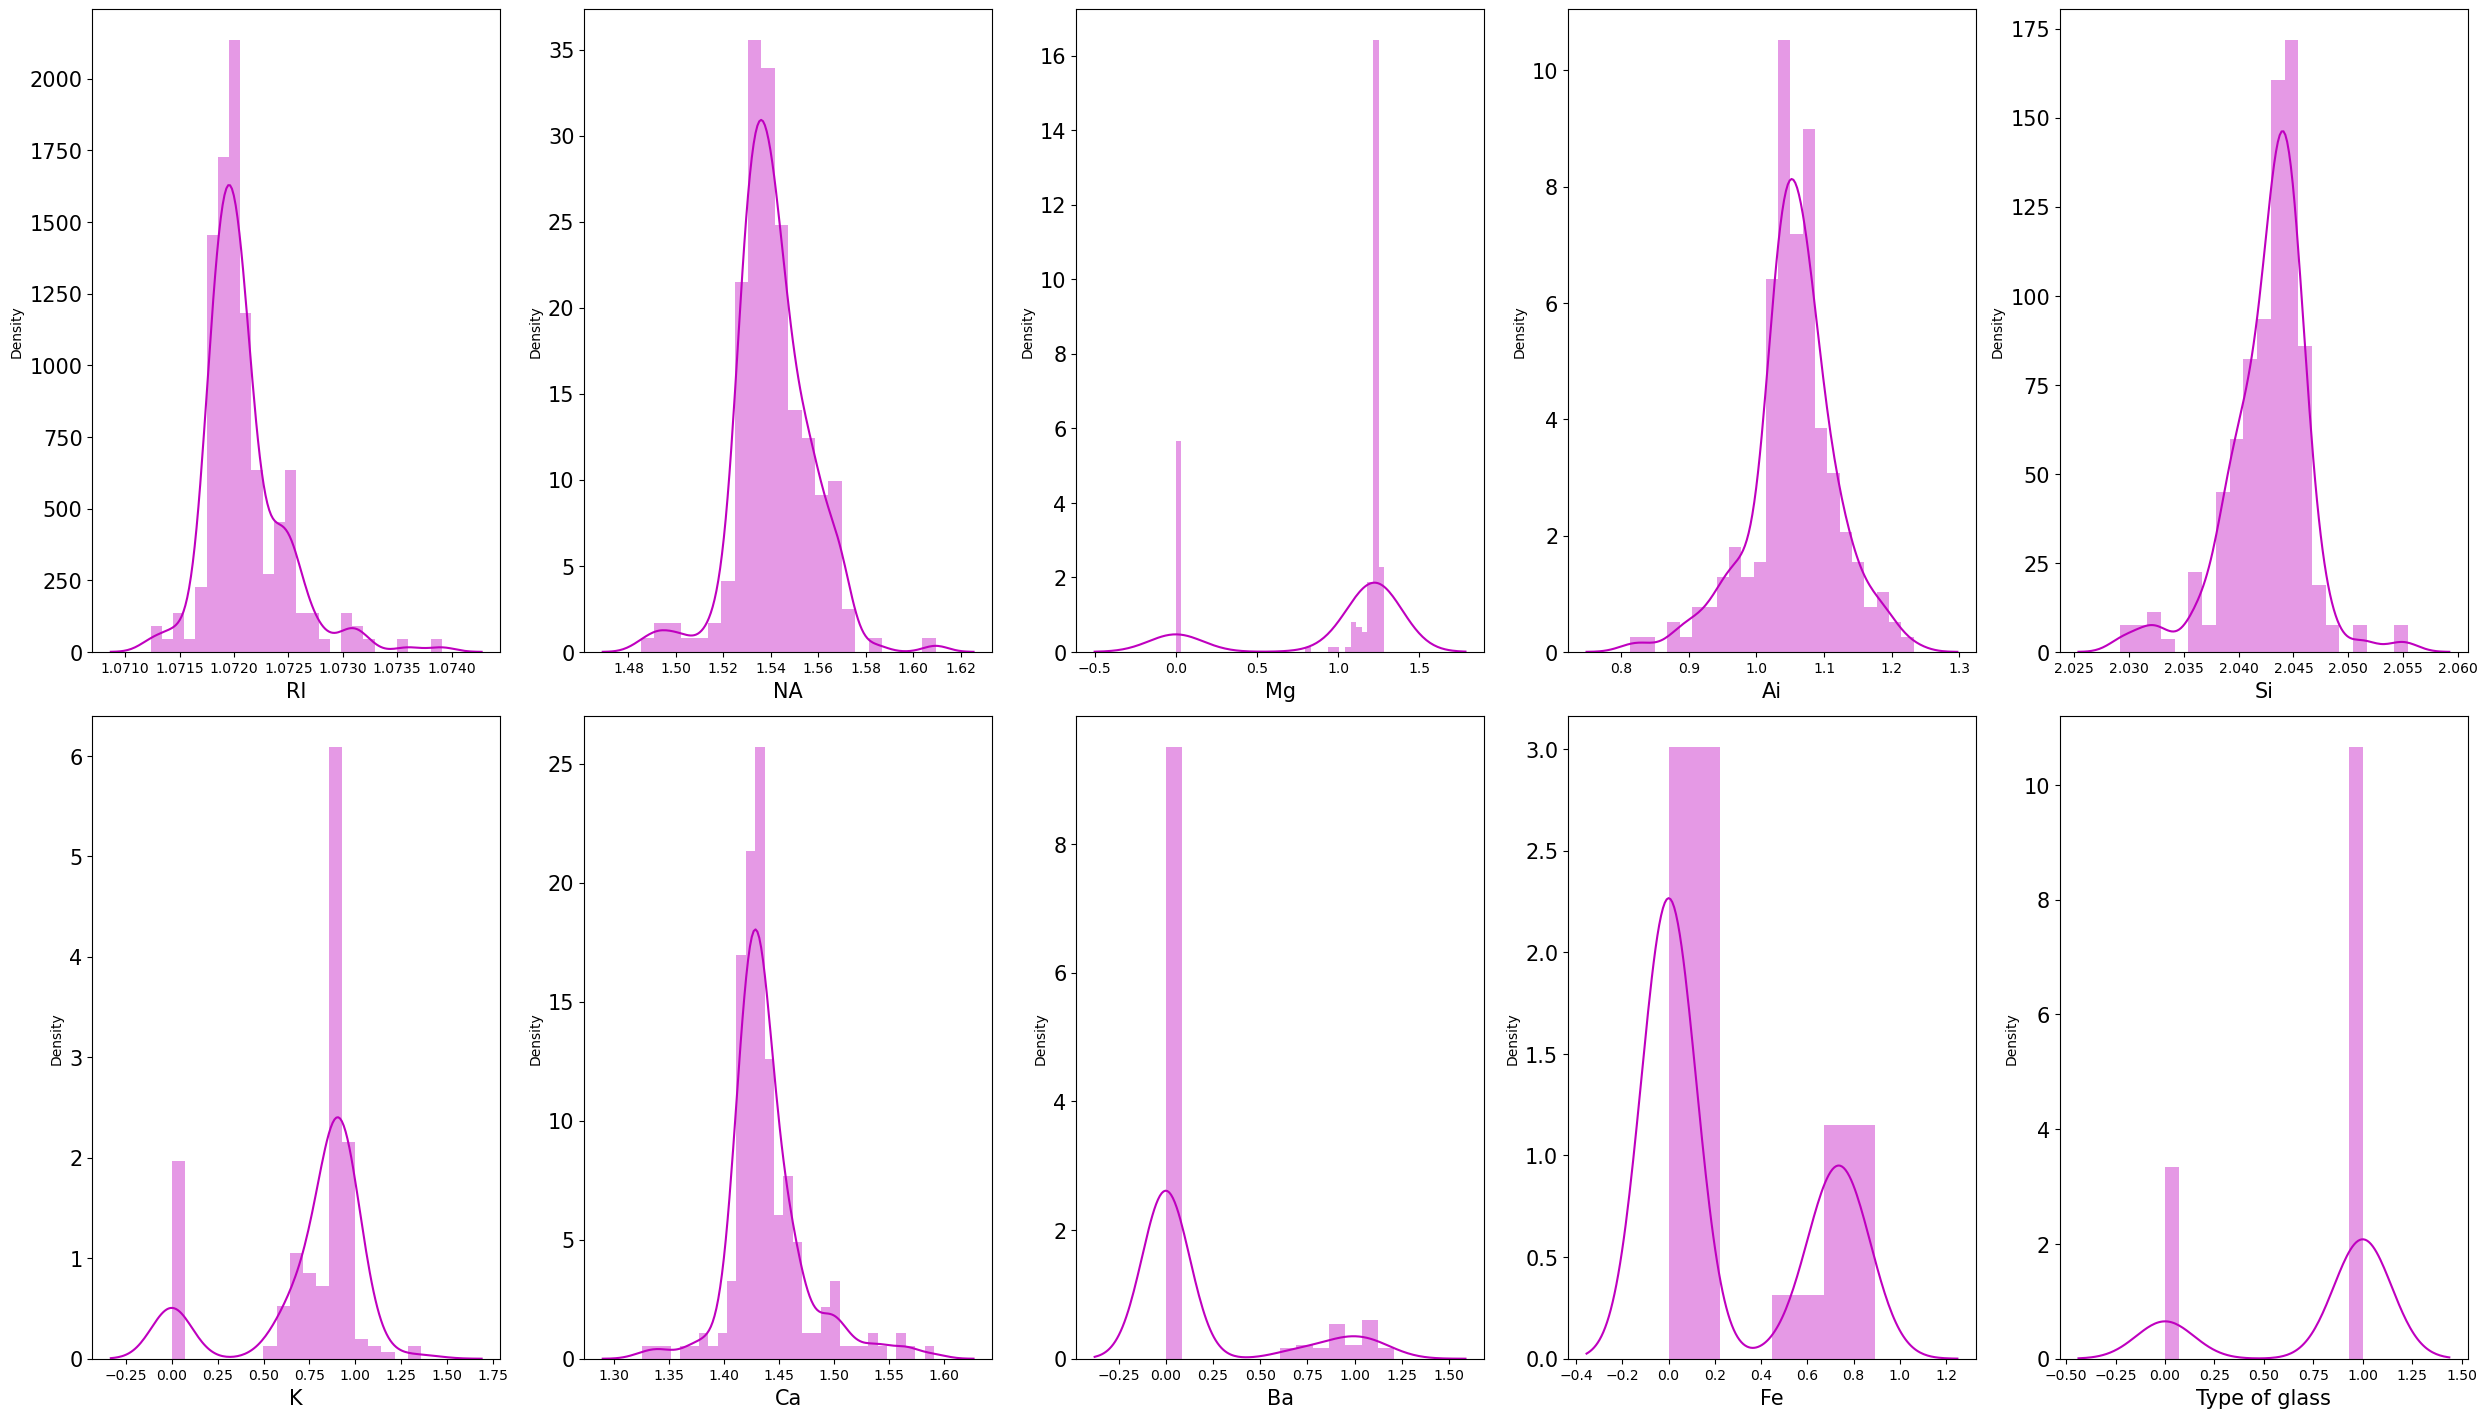

In [48]:
plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1
for i in df1:
    if plotnumber<=15:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(df1[i],color='m')
        plt.xlabel(i,fontsize=15)
        plt.yticks(rotation=0,fontsize=15)
        
    plotnumber+=1
plt.tight_layout()


here we made the multiclassification data into binary class classification data after inserting the values within 0 and 1 so in this dataset 1 is representing the ('window glass') and 0 is representing the ('non window glass')

# Checking the correlation with the target variable

In [49]:
corr=df1.corr()
corr

,RI,NA,Mg,Ai,Si,K,Ca,Ba,Fe,Type of glass
RI,1.000000,-0.201938,-0.106653,-0.416020,-0.542480,-0.103425,0.799596,-0.110816,0.126337,0.134489
NA,-0.201938,1.000000,-0.253126,0.056583,-0.077545,-0.527885,-0.276005,0.405661,-0.174266,-0.437083
Mg,-0.106653,-0.253126,1.000000,-0.335784,-0.168720,0.517137,-0.375927,-0.528115,0.085406,0.673701
Ai,-0.416020,0.056583,-0.335784,1.000000,0.036765,0.020275,-0.290399,0.487354,-0.041663,-0.498541
Si,-0.542480,-0.077545,-0.168720,0.036765,1.000000,-0.206159,-0.185768,0.018109,-0.070806,-0.145130
K,-0.103425,-0.527885,0.517137,0.020275,-0.206159,1.000000,-0.265282,-0.402812,0.159768,0.504295
Ca,0.799596,-0.276005,-0.375927,-0.290399,-0.185768,-0.265282,1.000000,-0.145578,0.114570,-0.028875
Ba,-0.110816,0.405661,-0.528115,0.487354,0.018109,-0.402812,-0.145578,1.000000,-0.002478,-0.585308
Fe,0.126337,-0.174266,0.085406,-0.041663,-0.070806,0.159768,0.114570,-0.002478,1.000000,0.215503
Type of glass,0.134489,-0.437083,0.673701,-0.498541,-0.145130,0.504295,-0.028875,-0.585308,0.215503,1.000000


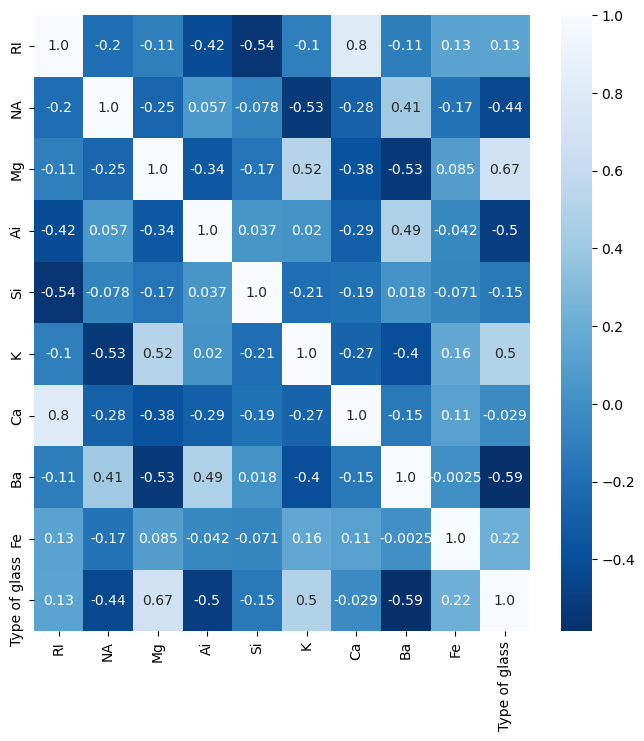

In [50]:
plt.figure(figsize=(8,8))
sns.heatmap(corr,cmap='Blues_r',annot=True,fmt='0.2')
plt.show()

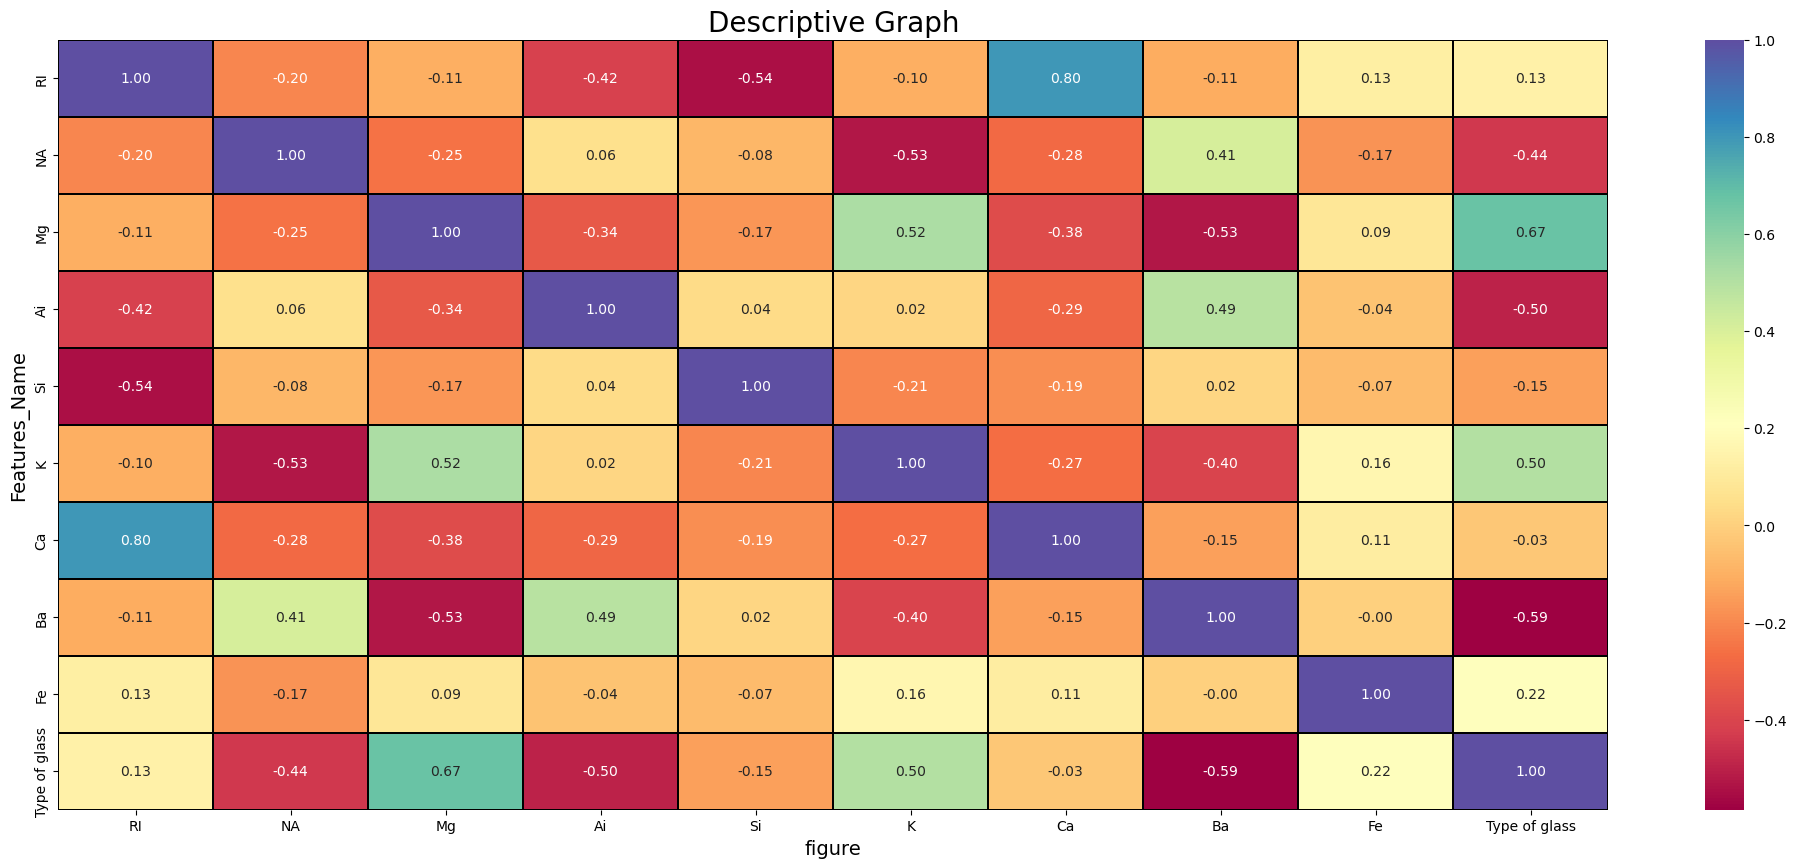

In [51]:
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('figure',fontsize=14)
plt.ylabel('Features_Name',fontsize=14)
plt.title('Descriptive Graph',fontsize=20)
plt.show()

In [52]:
corr['Type of glass'].sort_values(ascending=True)

Ba              -0.585308
Ai              -0.498541
NA              -0.437083
Si              -0.145130
Ca              -0.028875
RI               0.134489
Fe               0.215503
K                0.504295
Mg               0.673701
Type of glass    1.000000
Name: Type of glass, dtype: float64

in this dataset we can see the 'Ri'('refractive index'), 'Mg'('Magnesium'), 'K'('potassium'),'Fe'('iron') this are the features which are positively correlated with the target variable.

and 'NA'('Sodium'('unit measurment:weight percent in corresponding oxide,as are attributes 4-10')), 'Ai'('Aluminium'),'Si'('Silicon'), 'Ca'('Calcium'), 'Ba'('Barium') this are the features which are negatively correlated with the target variable.

in this dataset we can see highest positive correlated value is ('0.67') and the highest negative correlated  value is ('-0.58')


# separating the features 

In [53]:
x=df_new.drop('Type of glass',axis=1)
y=df_new['Type of glass']


In [54]:
print(x.shape)
print(x.head(5))

(194, 9)
                RI     NA    Mg    Ai     Si     K    Ca   Ba   Fe
id number                                                         
1          1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0
2          1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
3          1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0
4          1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0
5          1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0


In [55]:
print(y.shape)
print(y.head(5))


(194,)
id number
1    1
2    1
3    1
4    1
5    1
Name: Type of glass, dtype: int64


here we have separeted the features for the further process of machine learning

# feature scaling using standard scaler and label


In [56]:
std=StandardScaler()
x=pd.DataFrame(std.fit_transform(x),columns=x.columns)
x

,RI,NA,Mg,Ai,Si,K,Ca,Ba,Fe
0,1.291781,0.332127,1.233397,-0.729105,-1.612464,-1.319609,-0.075653,-0.346292,-0.603056
1,-0.197832,0.704398,0.551581,-0.141722,0.016082,0.172091,-1.008147,-0.346292,-0.603056
2,-0.824346,0.168328,0.513277,0.264928,0.461790,-0.147559,-1.058826,-0.346292,-0.603056
3,-0.175926,-0.308179,0.620529,-0.299864,-0.189629,0.491741,-0.612851,-0.346292,-0.603056
4,-0.281075,-0.218834,0.566903,-0.412822,0.616073,0.420708,-0.764888,-0.346292,-0.603056
...,...,...,...,...,...,...,...,...,...
189,-0.727959,1.419158,-2.206325,2.975928,0.221793,-1.532708,0.633854,1.169695,-0.603056
190,-0.802440,1.076668,-2.206325,3.292211,-0.189629,-1.248575,0.360187,2.629534,-0.603056
191,-0.530805,2.238153,-2.206325,1.281553,0.581788,-1.532708,-0.430406,4.117447,-0.603056
192,1.134057,1.404267,-2.206325,1.349328,1.198921,-1.532708,-0.389863,4.257816,-0.603056


here we have scaled the data by using standard scaler for removing the issue of biasness

# Checking variance_inflation_factor values

In [57]:
# finding the variance_inflation_factor in each scaled features

vif=pd.DataFrame()
vif['variables']=x.columns
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,variables,vif values
0,RI,5.632389
1,NA,44.471428
2,Mg,172.914812
3,Ai,21.083266
4,Si,34.478918
5,K,11.284209
6,Ca,104.913151
7,Ba,14.102161
8,Fe,1.105388


In [58]:
x=x.drop('Mg',axis=1)


here we droped the highest correlated value features 'Mg'('Magnesium')

In [59]:
vif=pd.DataFrame()
vif['features']=x.columns
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,features,VIF values
0,RI,5.391407
1,NA,3.271497
2,Ai,2.163785
3,Si,2.737021
4,K,3.013948
5,Ca,3.183225
6,Ba,2.108446
7,Fe,1.064526


here we can consider our threshold value is 5 and here we have resolved the issue of multicollinearity

# Over_sampling by using SMOTE method

In [60]:
y.value_counts()

1    154
0     40
Name: Type of glass, dtype: int64

In [61]:
smt=SMOTE()

x,y=smt.fit_resample(x,y)

In [62]:
y.value_counts()

1    154
0    154
Name: Type of glass, dtype: int64

here we have done the over sampling method by using the SMOTE method for increasing our model performance

# modeling

In [63]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print('Best accuracy is',maxAccu,'at random_state',maxRS)

Best accuracy is 1.0 at random_state 8


# creating the train_test_split

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Decision Tree Classifier

In [65]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred=dtc.predict(x_test)
print(accuracy_score(y_test,dtc_pred))
print(confusion_matrix(y_test,dtc_pred))
print(classification_report(y_test,dtc_pred))

0.956989247311828
[[41  3]
 [ 1 48]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        44
           1       0.94      0.98      0.96        49

    accuracy                           0.96        93
   macro avg       0.96      0.96      0.96        93
weighted avg       0.96      0.96      0.96        93



the accuracy of DecisionTreeClassifier is 95.69% percentile

# svc (support vector classifier) Classifier

In [66]:
svc=SVC()
svc.fit(x_train,y_train)
svc_pred=svc.predict(x_test)
print(accuracy_score(y_test,svc_pred))
print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))

1.0
[[44  0]
 [ 0 49]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        49

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93



the accuracy score of svc(Support vector classifier) is 100% percentile

# KNeighbors classifier

In [67]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
print(accuracy_score(y_test,knn_pred))
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))

1.0
[[44  0]
 [ 0 49]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        49

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93



the accuracy of KNeighbors classifier is 97.84% percentile

# Random Forest Classifier

In [68]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pred=rfc.predict(x_test)
print(accuracy_score(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

1.0
[[44  0]
 [ 0 49]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        49

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93



the accuracy of Random Forest Classifier is 100% percentile

# Extra Trees Classifier

In [69]:
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
etc_pred=etc.predict(x_test)
print(accuracy_score(y_test,etc_pred))
print(confusion_matrix(y_test,etc_pred))
print(classification_report(y_test,etc_pred))

1.0
[[44  0]
 [ 0 49]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        49

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93



the accuracy for Extra Trees Classifie is 100% percentile

# Ada Boost Classifier

In [70]:
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
abc_pred=abc.predict(x_test)
print(accuracy_score(y_test,abc_pred))
print(confusion_matrix(y_test,abc_pred))
print(classification_report(y_test,abc_pred))

1.0
[[44  0]
 [ 0 49]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        49

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93



the accuracy for AdaBoostClassifier is 95.69% percentile

# Gradient Boosting Classifier

In [71]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_pred=gbc.predict(x_test)
print(accuracy_score(y_test,gbc_pred))
print(confusion_matrix(y_test,gbc_pred))
print(classification_report(y_test,gbc_pred))

1.0
[[44  0]
 [ 0 49]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        49

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93



 the accuracy for GradientBoostingClassifier  is 98.92%  percentile  

# Logistic Regression

In [72]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
lg_pred=lg.predict(x_test)
print(accuracy_score(y_test,lg_pred))
print(confusion_matrix(y_test,lg_pred))
print(classification_report(y_test,lg_pred))

0.989247311827957
[[43  1]
 [ 0 49]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        44
           1       0.98      1.00      0.99        49

    accuracy                           0.99        93
   macro avg       0.99      0.99      0.99        93
weighted avg       0.99      0.99      0.99        93



the accuracy for LogisticRegression is 95.69% percentile

# cross validation score

In [73]:
score1=cross_val_score(dtc,x,y,cv=5)
print(score1)
print(score1.mean())
print('the difference between the accuracy score and the cross validation score',(accuracy_score(y_test,dtc_pred)-score1.mean())*100)

[0.9516129  0.9516129  0.96774194 0.86885246 0.96721311]
0.9414066631411953
the difference between the accuracy score and the cross validation score 1.558258417063274


In [75]:
score2=cross_val_score(svc,x,y,cv=5)
print(score2)
print(score2.mean())
print('difference between the accuracy score and cross validatiom score',(accuracy_score(y_test,svc_pred)-score2.mean())*100)

[0.98387097 1.         0.98387097 0.91803279 0.98360656]
0.9738762559492333
difference between the accuracy score and cross validatiom score 2.6123744050766673


In [76]:
score3=cross_val_score(knn,x,y,cv=5)
print(score3)
print(score3.mean())
print('difference between the accuracy score and cross validation score',accuracy_score(y_test,knn_pred))

[0.96774194 0.98387097 1.         0.93442623 0.95081967]
0.9673717609730301
difference between the accuracy score and cross validation score 1.0


In [77]:
score4=cross_val_score(rfc,x,y,cv=5)
print(score4)
print(score4.mean())
print('difference between the accuracy score and cross validation score',(accuracy_score(y_test,rfc_pred)-score4.mean())*100)

[0.98387097 1.         0.96774194 0.93442623 0.98360656]
0.9739291380222104
difference between the accuracy score and cross validation score 2.6070861977789628


In [78]:
score5=cross_val_score(abc,x,y,cv=5)
print(score5)
print(score5.mean())
print('difference between the accuracy score and the cross validation score',(accuracy_score(y_test,abc_pred)-score5.mean())*100)

[0.9516129  0.96774194 0.9516129  0.95081967 0.98360656]
0.9610787942887361
difference between the accuracy score and the cross validation score 3.8921205711263895


In [79]:
score6=cross_val_score(etc,x,y,cv=5)
print(score6)
print(score6.mean())
print('difference between the accuracy score and the cross validation score',(accuracy_score(y_test,etc_pred)-score6.mean())*100)

[1.         1.         0.96774194 0.96721311 0.98360656]
0.9837123215230037
difference between the accuracy score and the cross validation score 1.6287678476996303


In [80]:
score7=cross_val_score(gbc,x,y,cv=5)
print(score7)
print(score7.mean())
print('difference between the accuracy score and the cross validation is',(accuracy_score(y_test,gbc_pred)-score7.mean())*100)

[0.98387097 0.98387097 0.98387097 0.90163934 0.98360656]
0.9673717609730301
difference between the accuracy score and the cross validation is 3.2628239026969874


In [81]:
score8=cross_val_score(lg,x,y,cv=5)
print(score8)
print(score8.mean())
print('difference between the accuracy score and the cross validation score is',(accuracy_score(y_test,lg_pred)-score8.mean())*100)

[0.96774194 0.98387097 0.98387097 0.90163934 0.98360656]
0.9641459545214172
difference between the accuracy score and the cross validation score is 2.510135730653984


here we can see the Extra Trees Classifier is giving high accuracy 98.37 so it is our best model 

# Hyper parameter tunning

In [84]:
param={'criterion':['gini','entropy'],
      'random_state':[10,50,100],
      'max_depth':[0,10,20],
      'n_jobs':[-2,-1,1],
      'n_estimators':[50,100,200,300]}


In [85]:
grid=GridSearchCV(etc,param,cv=5)

In [86]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1], 'random_state': [10, 50, 100]})

In [89]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 50}

In [91]:
Final_model=ExtraTreesClassifier(criterion='gini',max_depth=40,n_estimators=100,n_jobs=-2,random_state=50)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
accu=accuracy_score(y_test,pred)
print(accu*100)

100.0


In [92]:
Final_model1=ExtraTreesClassifier(criterion='entropy',max_depth=20,n_estimators=100,n_jobs=-2,random_state=50)
Final_model1.fit(x_train,y_train)
pred1=Final_model.predict(x_test)
accu=accuracy_score(y_test,pred1)
print(accu*100)

100.0


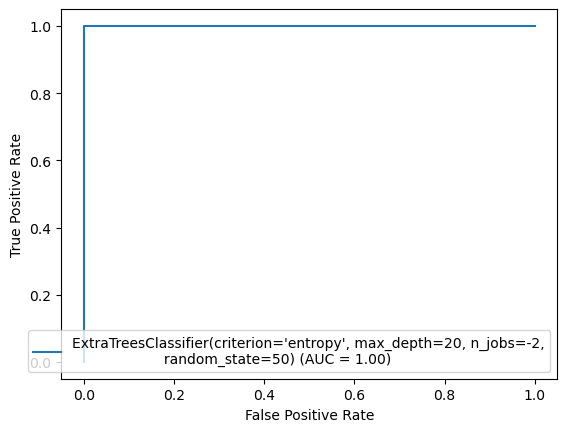

In [93]:
from sklearn import metrics
fpr,tpr, threshold=metrics.roc_curve(y_test,pred1)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=Final_model1)
display.plot()

# saving model

In [95]:
# saving the model
import joblib
joblib.dump(Final_model,'Glass_prediction_analysis.pkl')

['Glass_prediction_analysis.pkl']

In [97]:
# again loading the saved model
model=joblib.load('Glass_prediction_analysis.pkl')

# pred

prediction = model.predict(x_test)
prediction

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1], dtype=int64)

In [100]:
z=np.array(y_test)
dr=pd.DataFrame()
dr['prediction']=prediction
dr['original']=z
dr

,prediction,original
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
88,1,1
89,0,0
90,0,0
91,1,1
